In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [2]:
df = pd.read_csv("HR_Analytics.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [8]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

In [9]:
# let's encode the attrition column so we can use it for EDA
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [22]:
df.shape

(1470, 33)

In [ ]:
# dropping these two columns as they only have one same value
df = df.drop(['EmployeeCount','StandardHours'], axis=1) 

In [20]:
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  ... PerformanceRating  \
0                           2  ...                 3   
1                           3  ...                 4   
2                           4  ...                 3   
3                           4  ...                 3   
4                           1  ...                 3   
...                       ...  ...               ...   
1465                        3  ...                 3   
1466                        4  ...                 3   
1467                        2  ...                 4   
1468                        4  ...                 3   
1469                        2  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4 

In [21]:
df.columns #employee count and 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
df.shape

(1470, 33)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
#BusinessTravel , Department ,  EducationField , Gender , JobRole  , MaritalStatus, Over18, OverTime are categorical data
#hence we shall be plotting them separately

In [26]:
df_visualization_nominal=df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]].copy() #plotting nominal data

In [27]:
df_visualization_nominal.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


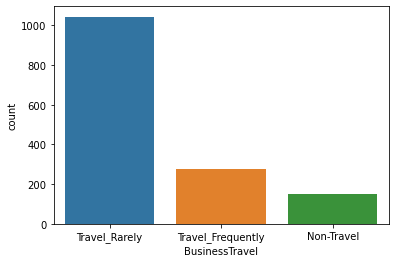

In [28]:
import seaborn as sns
BusinessTravel=sns.countplot(x="BusinessTravel", data=df_visualization_nominal)
print(df_visualization_nominal["BusinessTravel"].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


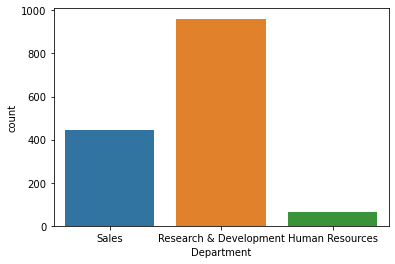

In [29]:
import seaborn as sns
Department=sns.countplot(x="Department", data=df_visualization_nominal)
print(df_visualization_nominal["Department"].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


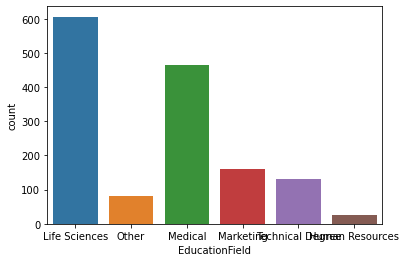

In [30]:
import seaborn as sns
Department=sns.countplot(x="EducationField", data=df_visualization_nominal)
print(df_visualization_nominal["EducationField"].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


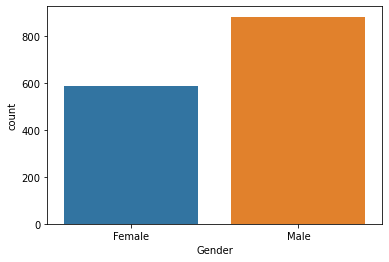

In [33]:
import seaborn as sns
Gender=sns.countplot(x="Gender",data=df_visualization_nominal)
print(df_visualization_nominal["Gender"].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


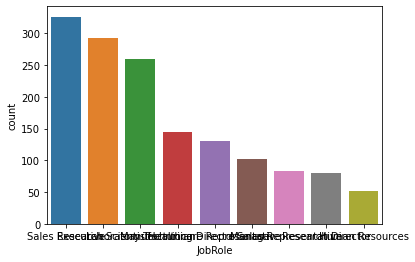

In [34]:
import seaborn as sns
Gender=sns.countplot(x="JobRole",data=df_visualization_nominal)
print(df_visualization_nominal["JobRole"].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


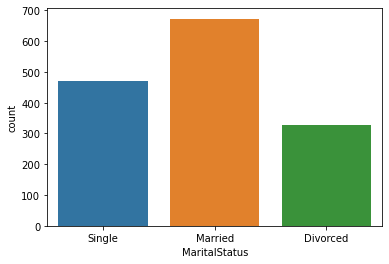

In [35]:
import seaborn as sns
MaritalStatus=sns.countplot(x="MaritalStatus",data=df_visualization_nominal)
print(df_visualization_nominal["MaritalStatus"].value_counts())


Y    1470
Name: Over18, dtype: int64


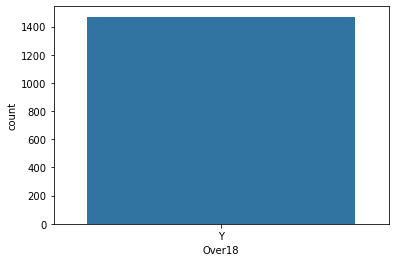

In [36]:
import seaborn as sns
Over18=sns.countplot(x="Over18",data=df_visualization_nominal)
print(df_visualization_nominal["Over18"].value_counts())

In [37]:
df.Over18

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object

In [38]:
# As we have seen in the graph as well. dropping the column 'over 18' as everybody is over 18 as they only have one same value, which is Y
df = df.drop(['Over18'], axis=1) 

In [39]:
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  ... PerformanceRating  \
0                           2  ...                 3   
1                           3  ...                 4   
2                           4  ...                 3   
3                           4  ...                 3   
4                           1  ...                 3   
...                       ...  ...               ...   
1465                        3  ...                 3   
1466                        4  ...                 3   
1467                        2  ...                 4   
1468                        4  ...                 3   
1469                        2  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4 

No     1054
Yes     416
Name: OverTime, dtype: int64


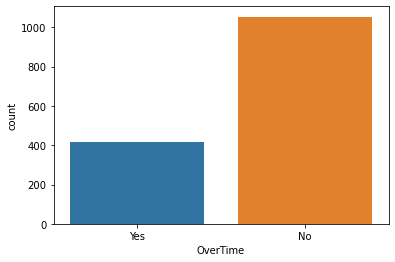

In [40]:
import seaborn as sns
Over18=sns.countplot(x="OverTime",data=df_visualization_nominal)
print(df_visualization_nominal["OverTime"].value_counts())

In [43]:
df.JobSatisfaction 

0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64

In [ ]:
#Plotting for continous data

In [49]:
df_visualization_ContinousData=df[["Attrition", "DailyRate", "DistanceFromHome", "Education", "EmployeeNumber", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", 
                            "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
                            "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]].copy() 

In [50]:
df_visualization_ContinousData.columns

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

ValueError: num must be 1 <= num <= 9, not 10

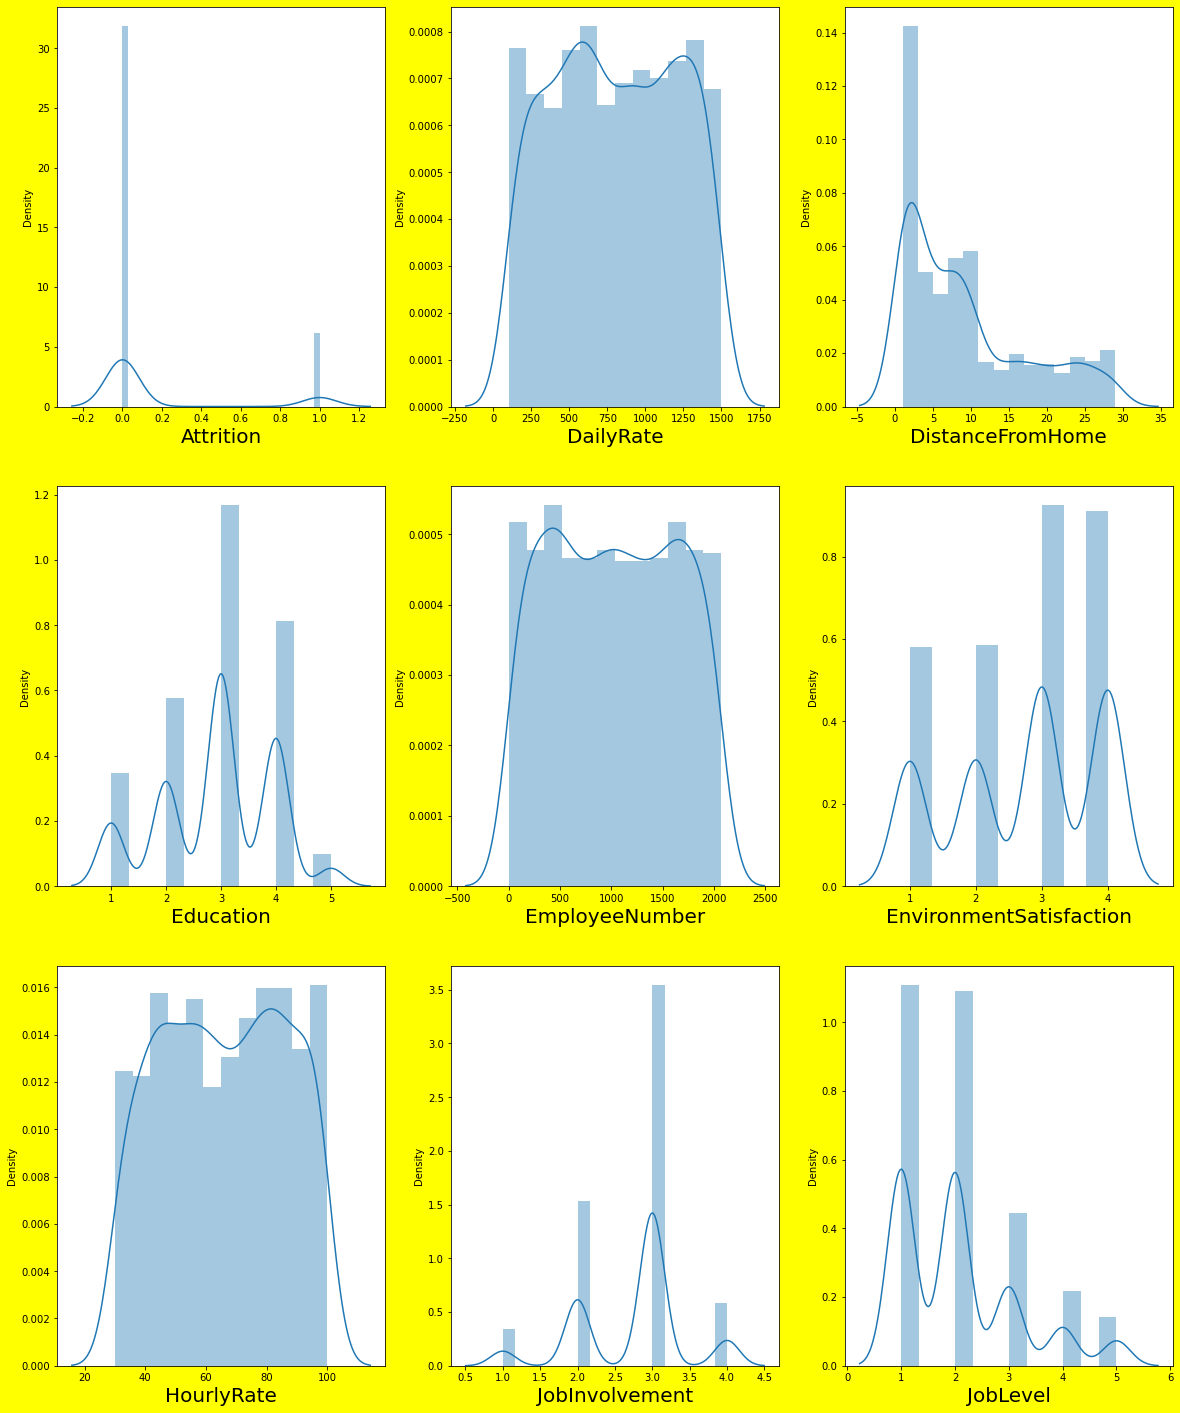

In [52]:
#EDA for continous data
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in df_visualization_ContinousData:
    if plotnumber <= 24: #column is 24 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df_visualization_ContinousData[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


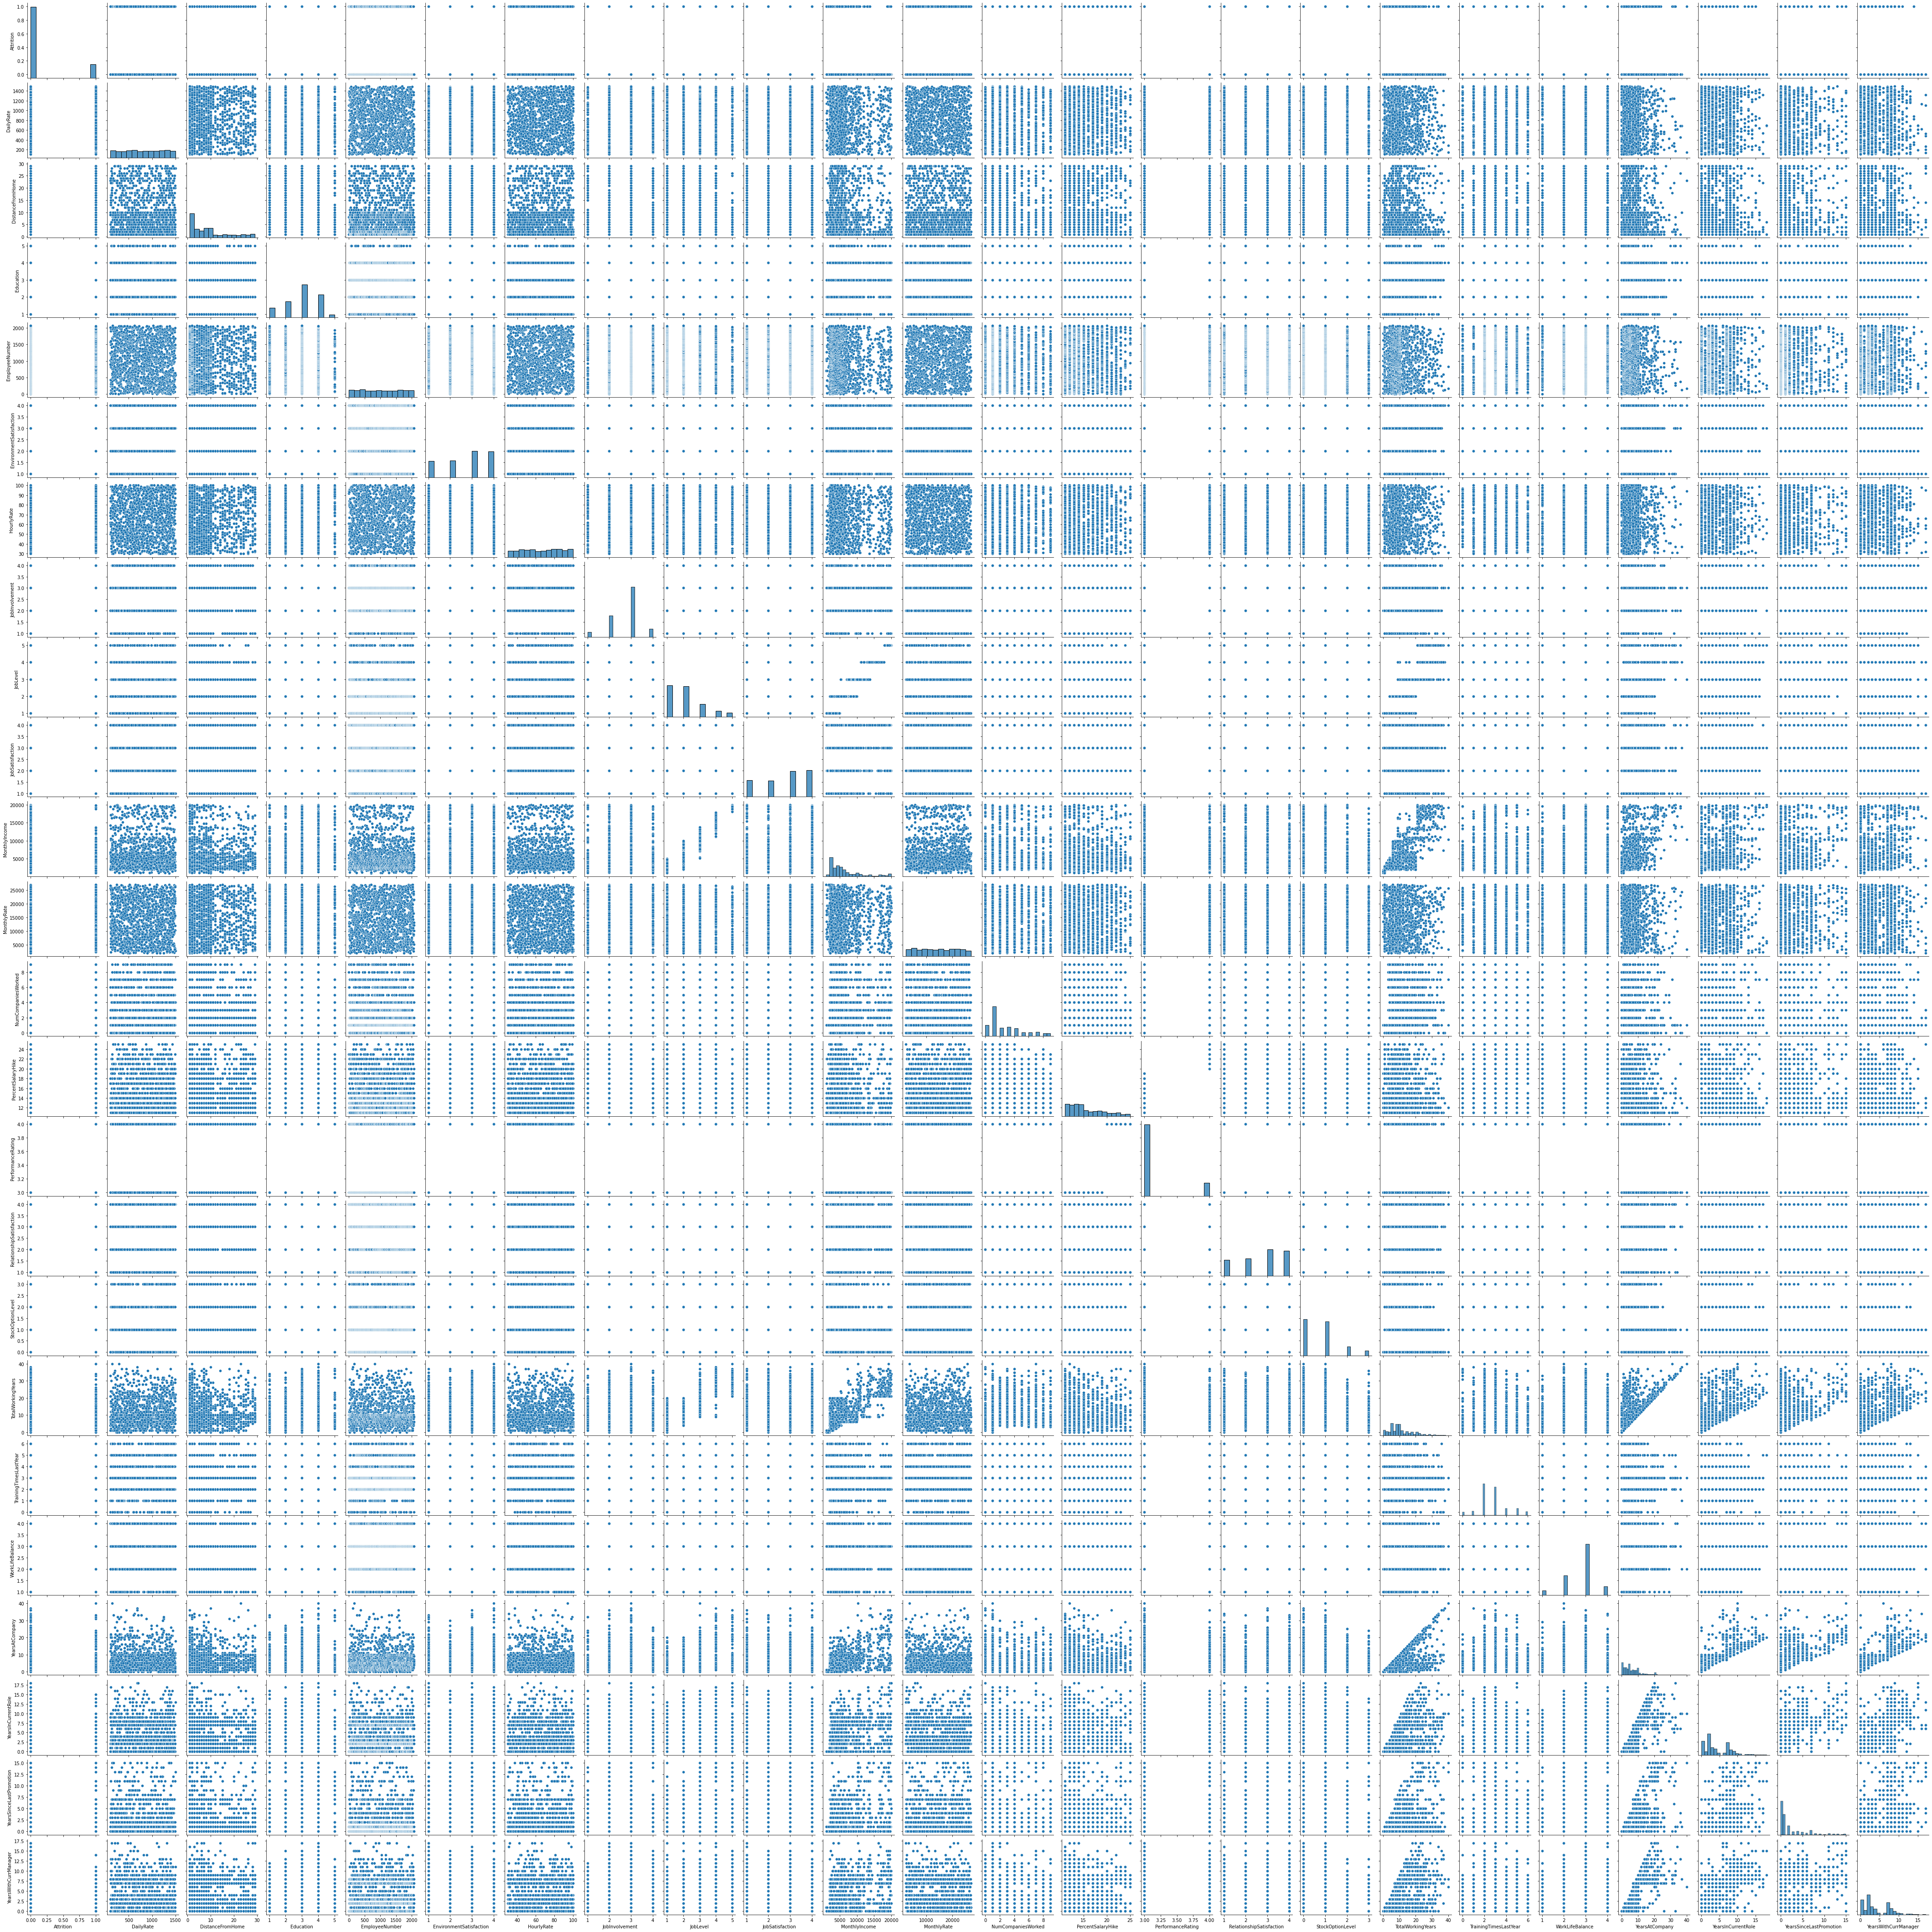

In [55]:
import matplotlib.pyplot as plt
sns.pairplot(df_visualization_ContinousData)
plt.savefig('pairplot.png')
plt.show()

In [63]:
# replacing zero values with the mean of the column since distance from home cannotbe 0
df['DistanceFromHome'] = df['DistanceFromHome'].replace(0, df['DistanceFromHome'].mean()

In [71]:
df.JobInvolvement

0       3
1       2
2       2
3       3
4       3
       ..
1465    4
1466    2
1467    4
1468    2
1469    4
Name: JobInvolvement, Length: 1470, dtype: int64

In [67]:
#Encoding of DataFrame:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [68]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [69]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2             1.0               1                        2  ...   
1             1             1.0               2                        3  ...   
2             2             4.0               4                        4  ...   
3             4             1.0               5                        4  ...   
4             1             3.0               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2             3.0            2061                        3  ...   
1466          1             3.0            2062                        4  ...   
1467          3             1.0            2064                        2  ...   
1468          3             3.0            2065                        4  ...   
1469          3             3.0            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

<AxesSubplot:>

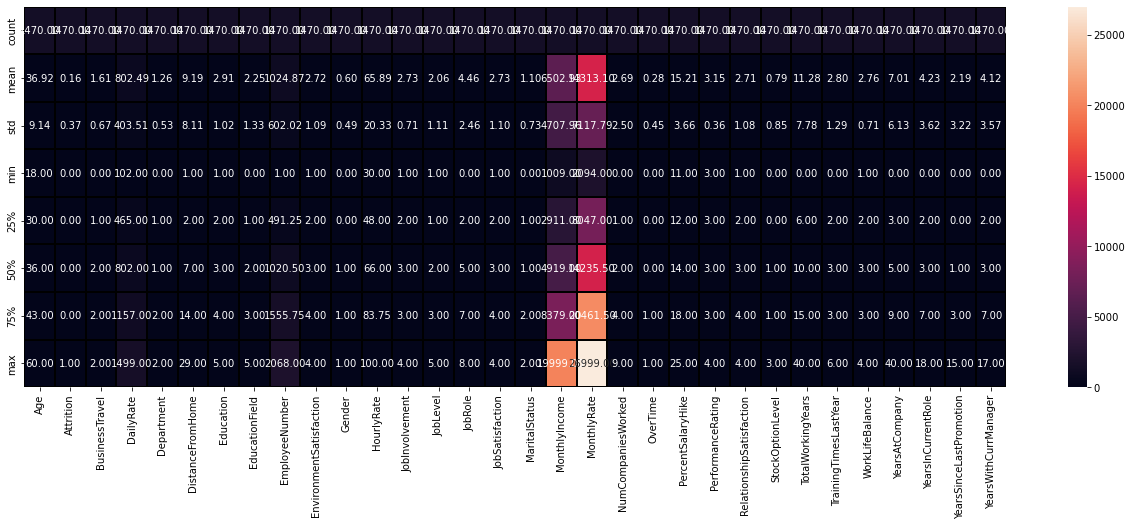

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [77]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
Perc

<AxesSubplot:>

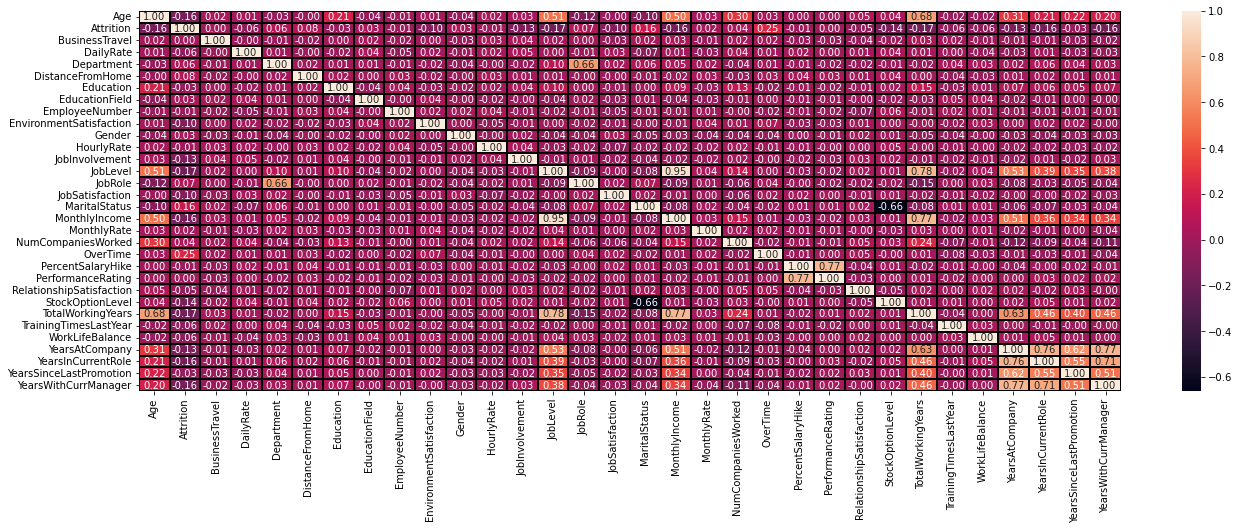

In [78]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#There is not a very strong correlation of the target column with any of the numerical columns. Few relations are as follows:

#senior employees have higher total working years copared to other categories
#The longer the tenure of the employee, the more their monthly income 
#Higher performance ratings are connected to salary hike percentage 
#Majority retain their same roles, and dont get a promotion very quickly


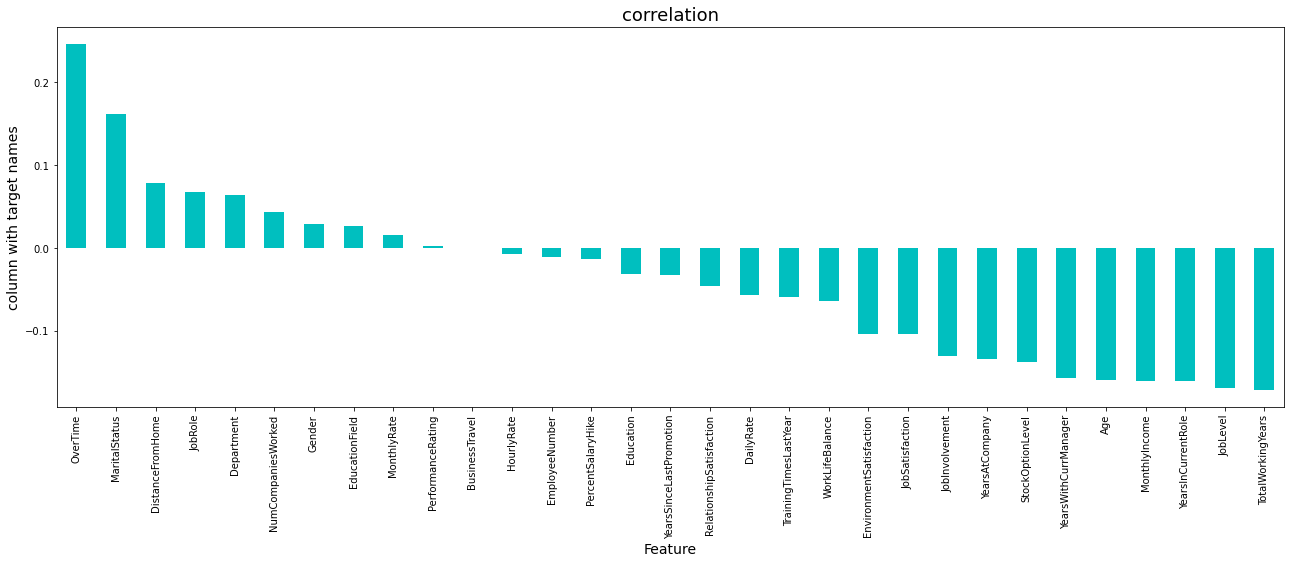

In [80]:
#Checking the columns which are positively and negative correlated with the target column of ATTRITION
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(["Attrition"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()
#overtime and marital dtatus are highly positively coreleated
#job involment and years at the company are highly negatvely corelated

In [81]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [ ]:
#skewed features - attrition, BusinessTravel  , DistanceFromHome, EducationField, JobLevel, OverTime  , MonthlyIncome ,
#NumCompaniesWorked, OverTime, PercentSalaryHike , PerformanceRating , StockOptionLevel  , TotalWorkingYears
#YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager  

In [ ]:
#since attrition is target variable, we wont be finding outliwrs from this column.
#BusinessTravel, JobLevel, OverTime are categorical columns, so no need to calculate outliers

<AxesSubplot:xlabel='EducationField'>

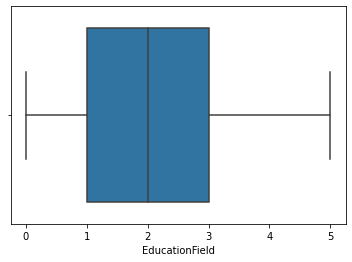

In [91]:
sns.boxplot(df["EducationField"])

<AxesSubplot:xlabel='EducationField'>

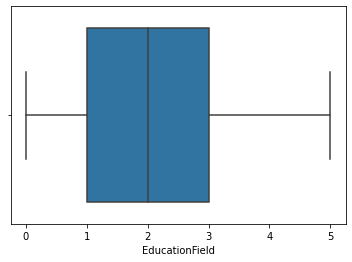

In [88]:
sns.boxplot(df["DistanceFromHome"])

<AxesSubplot:xlabel='MonthlyIncome'>

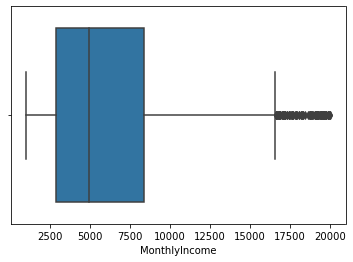

In [94]:
sns.boxplot(df["MonthlyIncome"])

<AxesSubplot:xlabel='YearsAtCompany'>

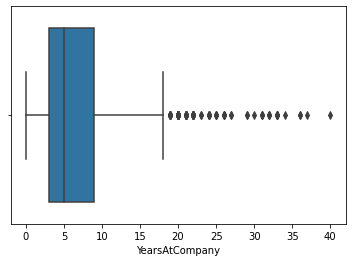

In [95]:
sns.boxplot(df["YearsAtCompany"])

<AxesSubplot:xlabel='YearsInCurrentRole'>

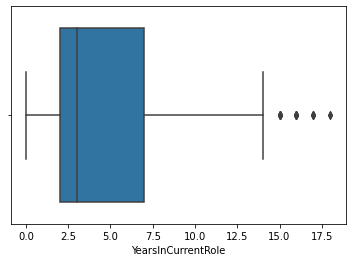

In [96]:
sns.boxplot(df["YearsInCurrentRole"])

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

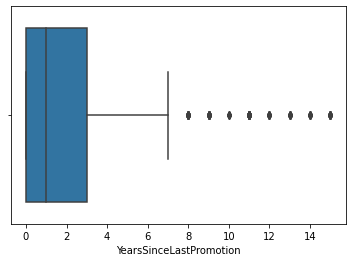

In [97]:
sns.boxplot(df["YearsSinceLastPromotion"])

<AxesSubplot:xlabel='YearsWithCurrManager'>

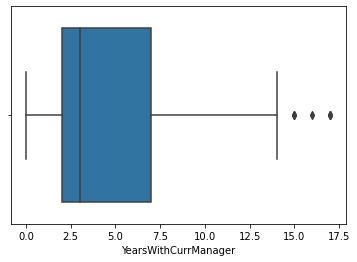

In [98]:
sns.boxplot(df["YearsWithCurrManager"])

In [100]:
df.EducationField

0       1.0
1       1.0
2       4.0
3       1.0
4       3.0
       ... 
1465    3.0
1466    3.0
1467    1.0
1468    3.0
1469    3.0
Name: EducationField, Length: 1470, dtype: float64

In [118]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshld=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
        30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
        28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
        25

In [119]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1             2.0       1102         2.0                 1   
1      49          0             1.0        279         1.0                 8   
2      37          1             2.0       1373         1.0                 2   
3      33          0             1.0       1392         1.0                 3   
4      27          0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0             1.0        884         1.0                23   
1466   39          0             2.0        613         1.0                 6   
1467   27          0             2.0        155         1.0                 4   
1468   49          0             1.0       1023         2.0                 2   
1469   34          0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2             1.0               1                        2  ...   
1             1             1.0               2                        3  ...   
2             2             4.0               4                        4  ...   
3             4             1.0               5                        4  ...   
4             1             3.0               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2             3.0            2061                        3  ...   
1466          1             3.0            2062                        4  ...   
1467          3             1.0            2064                        2  ...   
1468          3             3.0            2065                        4  ...   
1469          3             3.0            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

In [120]:
df_new_z.shape

(1387, 32)

In [123]:
x=df_new_z.drop("Attrition", axis=1)
y=df_new_z["Attrition"]

In [124]:
#Transforming data to remove skewness:
from sklearn.preprocessing import power_transform
X=power_transform(x,method="yeo-johnson")

In [125]:
X

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X)
Scaled_X

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [127]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(Scaled_X, i) for i in range(Scaled_X.shape[1])]
vif["Features"] = x.columns
#Let's check the values
vif

vif                  Features
0   1.931703                       Age
1   1.014579            BusinessTravel
2   1.028126                 DailyRate
3   2.172685                Department
4   1.018779          DistanceFromHome
5   1.067537                 Education
6   1.030486            EducationField
7   1.024082            EmployeeNumber
8   1.024901   EnvironmentSatisfaction
9   1.025233                    Gender
10  1.024667                HourlyRate
11  1.020701            JobInvolvement
12  5.978081                  JobLevel
13  2.023647                   JobRole
14  1.026351           JobSatisfaction
15  2.306432             MaritalStatus
16  5.852123             MonthlyIncome
17  1.022354               MonthlyRate
18  1.427316        NumCompaniesWorked
19  1.029926                  OverTime
20  1.758722         PercentSalaryHike
21  1.749120         PerformanceRating
22  1.026865  RelationshipSatisfaction
23  2.292260          StockOptionLevel
24  4.097751         TotalWorkingYears
25  1.025960     TrainingTimesLastYear
26  1.017579           WorkLifeBalance
27  6.316321            YearsAtCompany
28  3.516012        YearsInCurrentRole
29  1.373360   YearsSinceLastPromotion
30  3.437524      YearsWithCurrManager

In [ ]:
#There can be multi collinerality seen for MonthlyIncome and JobLevel

In [134]:
#PCA can be applied when you have too many features and their correlation is not that significant with target.
pca=PCA()
pca.fit_transform(Scaled_X)

array([[-0.42810433,  0.53875683, -2.55783827, ..., -0.83524424,
         0.16689242,  0.06902304],
       [-1.4556188 , -0.83412413,  0.97502965, ..., -0.71464202,
         0.10434671,  0.1056216 ],
       [ 3.48265666,  1.68584734, -0.45316697, ...,  0.24544903,
        -0.37157967,  0.29407285],
       ...,
       [ 0.59252725,  0.20187934,  1.44008786, ..., -0.1521393 ,
         0.34774051, -0.0188723 ],
       [-1.66975342, -0.23133509, -1.35965412, ...,  0.02492419,
        -0.25902428,  0.03967068],
       [ 0.35257896,  0.06421311,  0.14828148, ..., -0.49107857,
         0.02691903,  0.34751212]])

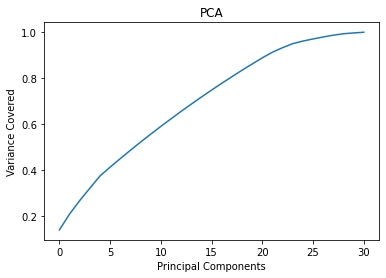

In [135]:
#Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [139]:
#aorund 28 columns,  are able to explain > 95 % variance. Its safe to consider starting 28 PC's
pca=PCA(n_components=28)
new_pcomp=pca.fit_transform(Scaled_X)
Princi_comp = pd.DataFrame(new_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC13', 'PC14', 'PC15', 'PC16' 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28'])
Princi_comp #PC 28 are the features


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.428104  0.538757 -2.557838 -0.205472 -0.388310  3.012706 -1.360301   
1    -1.455619 -0.834124  0.975030  1.477673  2.409799  0.505710  0.910374   
2     3.482657  1.685847 -0.453167  1.280361 -0.608610  1.637203  1.289029   
3     0.479727 -1.029327 -0.523238  0.009555 -1.354194  2.468040  0.755880   
4     1.548949  0.208447  0.737376  0.144582 -1.402330  0.480602  0.788841   
...        ...       ...       ...       ...       ...       ...       ...   
1382  0.129930  0.810521  1.220815  0.128368 -0.053769  0.133202 -0.185800   
1383 -1.856613  0.165000  0.933641  0.425493 -0.748590 -2.423384  3.041870   
1384  0.592527  0.201879  1.440088  0.791541  2.026093 -0.278730 -2.490506   
1385 -1.669753 -0.231335 -1.359654 -0.474445  0.026599 -0.196797  0.268486   
1386  0.352579  0.064213  0.148281  0.199840 -1.392093 -2.006578 -0.983420   

           PC8       PC9      PC10  ...      PC19      PC20      PC21  \
0     0.471213 -0.559471  3.352723  ...  0.763233 -0.209625 -0.457102   
1    -1.002124 -0.746057 -1.768092  ... -0.045854 -0.670158  0.312234   
2     1.225998  2.713555  0.767614  ... -0.631784 -0.879038  1.161636   
3    -0.079519 -0.440207 -0.403470  ... -0.710235  0.626415  1.348348   
4    -0.418028  1.769332 -0.519926  ...  1.144362  0.495032 -0.922402   
...        ...       ...       ...  ...       ...       ...       ...   
1382 -0.269536 -0.052885 -1.127705  ...  1.432079 -0.880936 -0.792037   
1383  0.204377 -0.501586  0.409045  ...  0.751190 -0.008024  0.728803   
1384  0.732954 -1.296560 -0.387019  ...  1.852746 -0.053088  0.659401   
1385 -0.147490  0.603306 -0.892961  ...  0.653886  0.305365 -0.122871   
1386  0.468013  0.722307 -0.257057  ...  0.788696 -0.125988  0.226039   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  
0    -1.104561  1.235475 -0.600165 -0.577097 -0.620400 -0.202587 -0.103936  
1    -0.676248  0.887342  1.313851 -0.279290  0.356116  0.095243 -0.594416  
2    -1.256911  0.229937  0.026952  0.502058 -0.541125 -0.117888 -0.048349  
3    -0.655173 -0.640942  0.272548 -0.901991  0.447260  1.733734  0.399791  
4    -1.723573 -0.346354 -1.222239 -0.180773 -0.617118 -0.115391 -0.400942  
...        ...       ...       ...       ...       ...       ...       ...  
1382 -0.265239  1.217790  0.004126  0.649232 -0.258141 -0.371073 -0.104649  
1383 -0.754995  0.501639 -0.564158  0.619404 -0.865741 -0.089260 -0.116660  
1384  1.063793  0.015619 -0.929295 -0.610564  0.092249 -0.165272 -0.286298  
1385  0.742267  1.899609  0.911056  0.053591 -0.029080 -0.113687  0.932430  
1386 -0.347076 -0.624799 -0.194828 -0.461818 -0.215722  0.317248  0.916195  

[1387 rows x 28 columns]

In [ ]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
from sklearn.metrics import classification_report

In [140]:
#Splitting the dataframe for logistic regression:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(Princi_comp,y,random_state=i,test_size=0.25)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 32 The model performs very well
At random_state state:- 32
Training accuracy_score is:- 88.2
Testing accuracy_score is:- 88.2 


At random_state state 48 The model performs very well
At random_state state:- 48
Training accuracy_score is:- 87.3
Testing accuracy_score is:- 87.3 


At random_state state 64 The model performs very well
At random_state state:- 64
Training accuracy_score is:- 87.6
Testing accuracy_score is:- 87.6 




In [142]:
X_train,x_test,y_train,y_test=train_test_split(Princi_comp,y,test_size=0.25, random_state=32)

In [143]:
def print_score(clf, x_train, x_test,y_train, y_test, train=True): #clf is classifier algorithm
    if train: 
        y_pred=clf.predict(x_train)
        print("\n================Train Result========")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
    elif train==False: #if tain false, it means it is test
              pred=clf.predict(x_test)
              print("\n‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒")
              print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
              print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [144]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 82.88%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 85.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       296
           1       0.00      0.00      0.00        51

    accuracy                           0.85       347
   macro avg       0.43      0.50      0.46       347
weighted avg       0.73      0.85      0.79       347



In [145]:
from sklearn.ensemble import GradientBoostingClassifier 
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)

#Call the function and pass dataset to check train and test score
print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)




================Train Result========
Accuracy Score: 89.04%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 80.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       296
           1       0.05      0.02      0.03        51

    accuracy                           0.80       347
   macro avg       0.45      0.48      0.46       347
weighted avg       0.73      0.80      0.76       347



In [146]:
from sklearn.ensemble import RandomForestClassifier #same code as above only randon forest used
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 74.35%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       296
           1       0.09      0.08      0.08        51

    accuracy                           0.74       347
   macro avg       0.47      0.47      0.47       347
weighted avg       0.73      0.74      0.74       347



In [147]:
from sklearn.model_selection import GridSearchCV
param_grid = { "C" : [1,5,10,20],
              'gamma':[0.001,0.01,0.02,0.002]
             }
    #checks how much error margin can be there  

In [148]:
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)

# best params
gridsearch.best_params_

{'C': 1, 'gamma': 0.001}

In [149]:
# SVC Model training and printing train and test score (post param update)
svc = SVC (C = 1, gamma=0.001)
svc.fit(x_train, y_train)

SVC(C=1, gamma=0.001)

In [150]:
#Call the function and pass dataset to check train and test score
print_score(svc, x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 82.88%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 85.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       296
           1       0.00      0.00      0.00        51

    accuracy                           0.85       347
   macro avg       0.43      0.50      0.46       347
weighted avg       0.73      0.85      0.79       347



In [151]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [152]:
X_train,x_test,y_train,y_test=train_test_split(Princi_comp,y,test_size=0.25, random_state=32)

In [153]:
pipe=Pipeline([('Scaler', StandardScaler()), #fit_transform
               ('PCA', PCA(n_components=28)), #fit_transform
               ('SVM', SVC(C=1, gamma=0.01))]) #only fit
#passes results from one model to another sequentially

In [154]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=28)),
                ('SVM', SVC(C=1, gamma=0.01))])

In [155]:
y_pred=pipe.predict(x_test)

In [156]:
accuracy_score(y_test,y_pred)

0.8530259365994236

In [162]:
import pickle
filename='HR_Analysis.pikl'
pickle.dump(lr, open(filename, 'wb'))